<a href="https://colab.research.google.com/github/payallgupta/CODSOFT/blob/main/IRISFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Successfully loaded the IRIS dataset.

--- Step 2: Explore the Data (Exploratory Data Analysis) ---
First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)


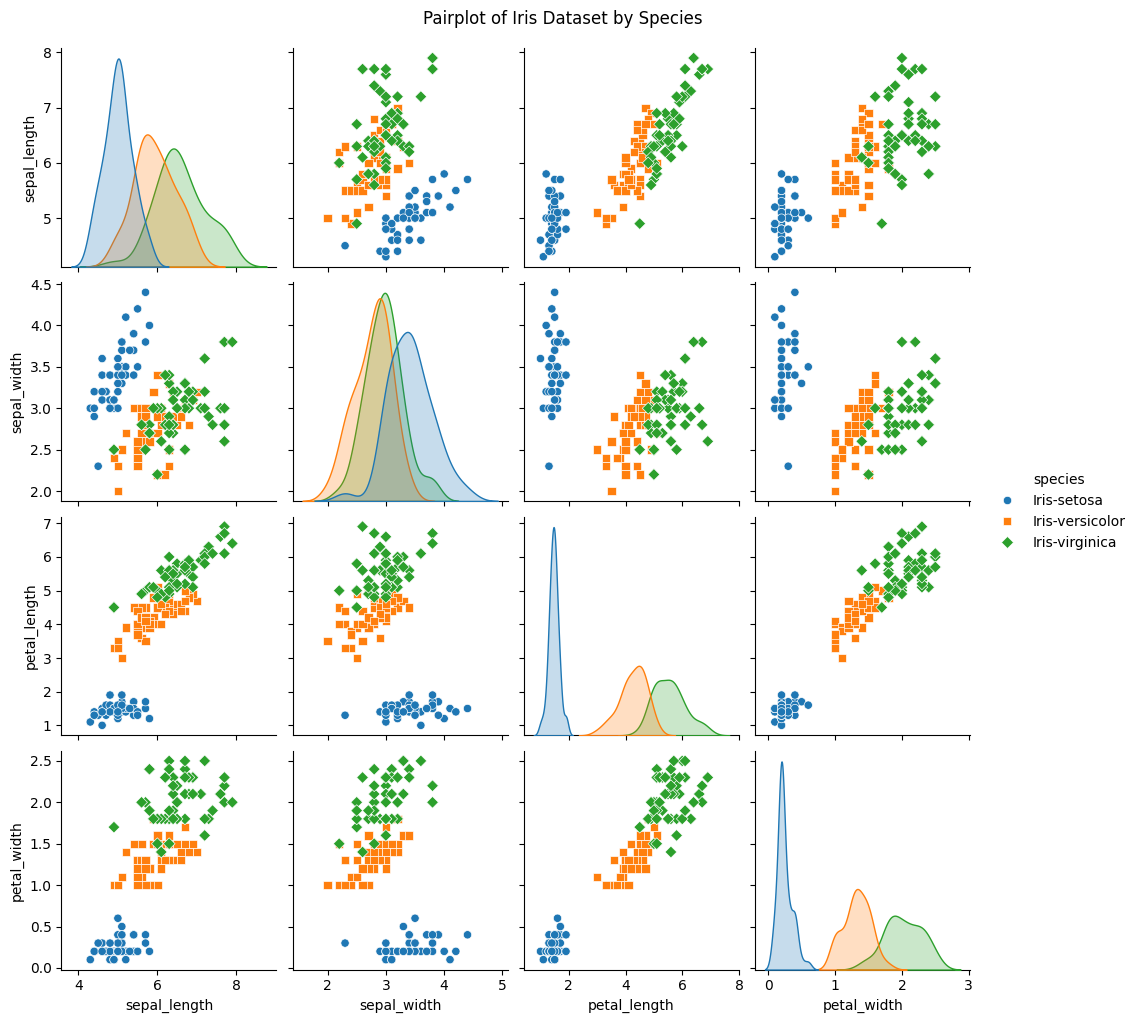


--- Step 3: Prepare the Data for Modeling ---

Features (X) head:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Encoded Target (y) sample:
[0 0 0 0 0]

Mapping from number to species name:
0 -> Iris-setosa
1 -> Iris-versicolor
2 -> Iris-virginica

--- Step 4: Building and Training the Classification Model ---

Training data has 120 samples.
Testing data has 30 samples.

Model training is complete!

--- Step 5: Evaluating the Model's Performance ---

Model Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.

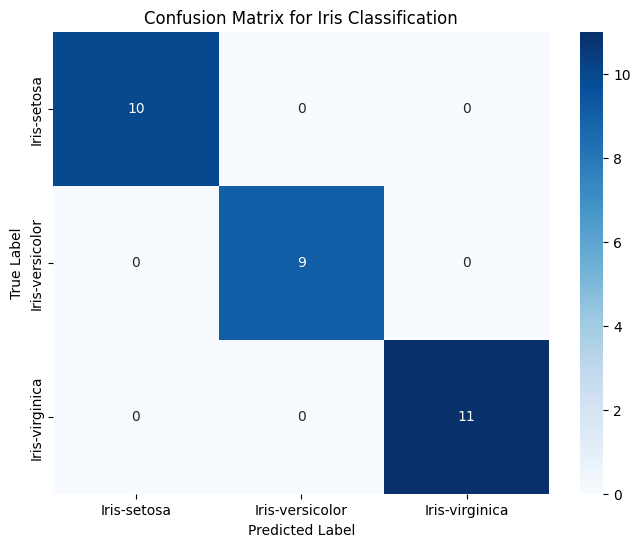

In [1]:
# =======================================================
# TASK 3: IRIS FLOWER SPECIES CLASSIFICATION
# =======================================================

# --- Step 0: Import necessary libraries ---
# Standard libraries for data handling and plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn for our machine learning model and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# --- Step 1: Load the Data from Google Colab ---
# The user has already uploaded the file to their Colab environment.
csv_path = '/content/IRIS.csv'

try:
    df = pd.read_csv(csv_path)
    print("Successfully loaded the IRIS dataset.")
except FileNotFoundError:
    print(f"Error: Make sure the file '{csv_path}' is uploaded to your Colab session.")
    # Exit the script if the file isn't found
    exit()


print("\n--- Step 2: Explore the Data (Exploratory Data Analysis) ---")

# Let's see the first few rows to understand the data's structure.
print("First 5 rows of the dataset:")
print(df.head())

# Get info on data types and check for any missing values.
print("\nDataset information:")
df.info()
# The Iris dataset is famously clean. As we can see, there are no missing values,
# and all the feature columns (sepal_length, etc.) are already numbers (float64).

# Let's check how many flowers of each species we have.
print("\nDistribution of species:")
print(df['species'].value_counts())
# The dataset is perfectly balanced, with 50 samples for each of the three species.

# Now for the most important part of EDA: visualizing the data.
# A pairplot is perfect for this. It shows how each feature relates to the others,
# and we can color the dots by the species to see if there are clear patterns.
print("\nGenerating pairplot to visualize feature relationships...")
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset by Species", y=1.02)
plt.show()

# From the pairplot, we can see that 'Iris-setosa' (the blue dots) is very
# distinct and easily separable from the other two species.
# 'Iris-versicolor' and 'Iris-virginica' are more mixed but still show clear trends.


print("\n--- Step 3: Prepare the Data for Modeling ---")

# Our features (X) are the measurement columns, and our target (y) is the 'species' column.
# The model needs numerical data, so we have to convert the text labels in 'species'
# (e.g., 'Iris-setosa') into numbers (e.g., 0, 1, 2).
# LabelEncoder is the perfect tool for this.

# Separate features and target
X = df.drop('species', axis=1)
y_text = df['species']

# Create and fit the LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_text)

# Let's check the result.
print("\nFeatures (X) head:")
print(X.head())
print("\nEncoded Target (y) sample:")
print(y[:5]) # Show first 5 encoded labels
print("\nMapping from number to species name:")
# The .classes_ attribute shows us what each number stands for.
for i, species_name in enumerate(le.classes_):
    print(f"{i} -> {species_name}")


print("\n--- Step 4: Building and Training the Classification Model ---")

# Split the data into a training set and a testing set.
# 80% for training, 20% for testing. random_state ensures we get the same split every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data has {X_train.shape[0]} samples.")
print(f"Testing data has {X_test.shape[0]} samples.")

# For this classification task, K-Nearest Neighbors (KNN) is a great choice.
# It's a simple, intuitive model that classifies a new flower based on the
# 'votes' of its nearest neighbors in the training data.
# I'll use k=3, meaning it will look at the 3 nearest neighbors.
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
model.fit(X_train, y_train)

print("\nModel training is complete!")


print("\n--- Step 5: Evaluating the Model's Performance ---")

# Now, let's use the trained model to make predictions on the test data.
y_pred = model.predict(X_test)

# Let's see how accurate our model is.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
# An accuracy of 100% is amazing! This means it correctly classified every single flower in the test set.
# This is common with the Iris dataset because the species are so distinct.

# The classification report gives us a more detailed look at performance for each species.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Finally, a confusion matrix gives a visual summary of performance.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Let's plot the confusion matrix to make it easier to read.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

# The diagonal of the confusion matrix shows the number of correct predictions for each class.
# Since all the off-diagonal cells are 0, it confirms that our model made zero mistakes on the test data.